In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mpl_finance as mpf
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
%matplotlib inline

A50 = pd.read_csv('C:/Users/veryv/OneDrive/桌面/MultiChart/A50/日盛A50.txt')
A50.dropna(how='any',inplace=True)

In [4]:
A50.head()

,Date,Time,Open,High,Low,Close,Volume
0,2011/06/01,09:05,9245.0,9245.0,9245.0,9245.0,1
1,2011/06/01,09:08,9245.0,9245.0,9230.0,9230.0,2
2,2011/06/01,09:11,9245.0,9245.0,9245.0,9245.0,1
3,2011/06/01,09:13,9230.0,9230.0,9230.0,9230.0,2
4,2011/06/01,09:14,9235.0,9235.0,9235.0,9235.0,1


In [10]:
# Growth rate
stock = pd.DataFrame({'Date':A50.Date,'Close': A50.Close})
stock = stock.set_index('Date')
stock_change = stock.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Close
Date,
2011/06/01,NaN
2011/06/01,-0.001624
2011/06/01,0.001624
2011/06/01,-0.001624
2011/06/01,0.000542


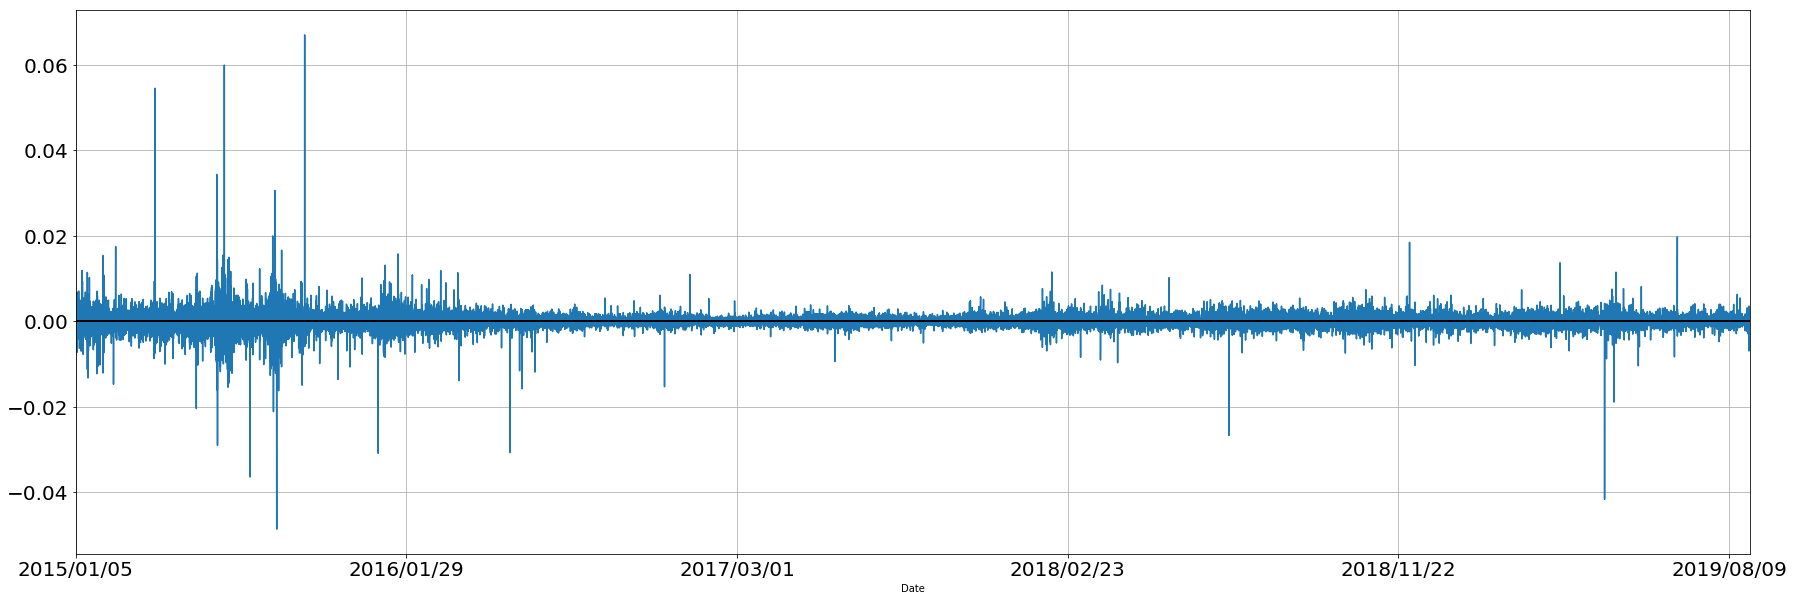

In [23]:
stock_change.loc['2015/01/01':].plot(grid = True,figsize = [30,10],fontsize = 20, legend = False).axhline(y = 0, color = "black", lw = 2)

In [25]:
import os
import pandas as pd

#设定转换周期period_type  转换为周是'W',月'M',季度线'Q',五分钟'5min',12天'12D'
period_type = 'D'
#进行转换，周线的每个变量都等于那一周中最后一个交易日的变量值
period_stock_data = A50.resample(period_type,how='last')
#周线的open等于那一周中第一个交易日的open
period_stock_data['open'] = A50['Open'].resample(period_type,how='first')
#周线的high等于那一周中的high的最大值
period_stock_data['high'] = A50['High'].resample(period_type,how='max')
#周线的low等于那一周中的low的最大值
period_stock_data['low'] = A50['Low'].resample(period_type,how='min')
#周线的volume等于那一周中volume和money各自的和
period_stock_data['volume'] = A50['Volume'].resample(period_type,how='sum')
#股票在有些周一天都没有交易，将这些周去除
period_stock_data.reset_index(inplace=True)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

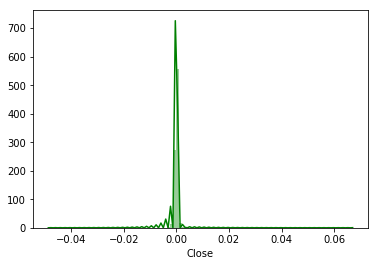

In [24]:
# Stock distribution
import seaborn as sns
sns.distplot(stock_change.loc['2015/01/01':]['Close'],color='green',bins=100)

In [14]:
qutotes = []
for _, (d, o, c, h, l) in enumerate(zip(A50.Date, A50.Open, A50.High, A50.Low, A50.Close)):
    d = date2num(datetime.strptime(d,'%Y/%m/%d'))
    val = (d, o, h, l, c)
    qutotes.append(val)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))      
fig.subplots_adjust(bottom=0.5)  
ax.xaxis_date()                            
plt.xticks(rotation=45)                    
plt.title('A50')                       
plt.xlabel('Date')                          
plt.ylabel('Price')
plt.gcf().autofmt_xdate()
plt.grid(True)    
mpf.candlestick_ohlc(ax, qutotes, width=0.6, colorup='g', colordown='r', alpha=1.0)
plt.show()